In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_emp=pd.read_csv('employee_compensation.csv')

In [3]:
df_emp.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


1.Year is categorical. You cannot do operation ont it,

2.Emp Id is not required.

In [4]:
df_emp.drop(columns=['Year'],inplace=True)


In [5]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Type            50000 non-null  object 
 1   Employee_Identifier  50000 non-null  int64  
 2   Salaries             50000 non-null  float64
 3   Overtime             50000 non-null  float64
 4   Other_Salaries       50000 non-null  float64
 5   Total_Salary         50000 non-null  float64
 6   Retirement           50000 non-null  float64
 7   Health/Dental        50000 non-null  float64
 8   Other_Benefits       50000 non-null  float64
 9   Total_Benefits       50000 non-null  float64
 10  Total_Compensation   50000 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 4.2+ MB


In [6]:
# EXCLUDE = np.number will be return all categorical data
cols=list(df_emp.select_dtypes(include=np.number).columns)
cols

['Employee_Identifier',
 'Salaries',
 'Overtime',
 'Other_Salaries',
 'Total_Salary',
 'Retirement',
 'Health/Dental',
 'Other_Benefits',
 'Total_Benefits',
 'Total_Compensation']

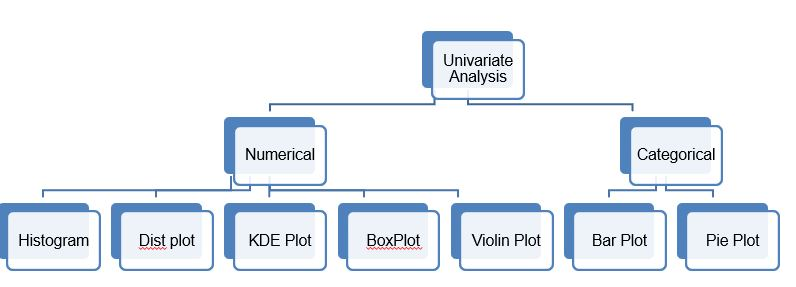

In [7]:
from IPython.display import Image
Image(filename='Univariate.JPG',width=600,height=200)

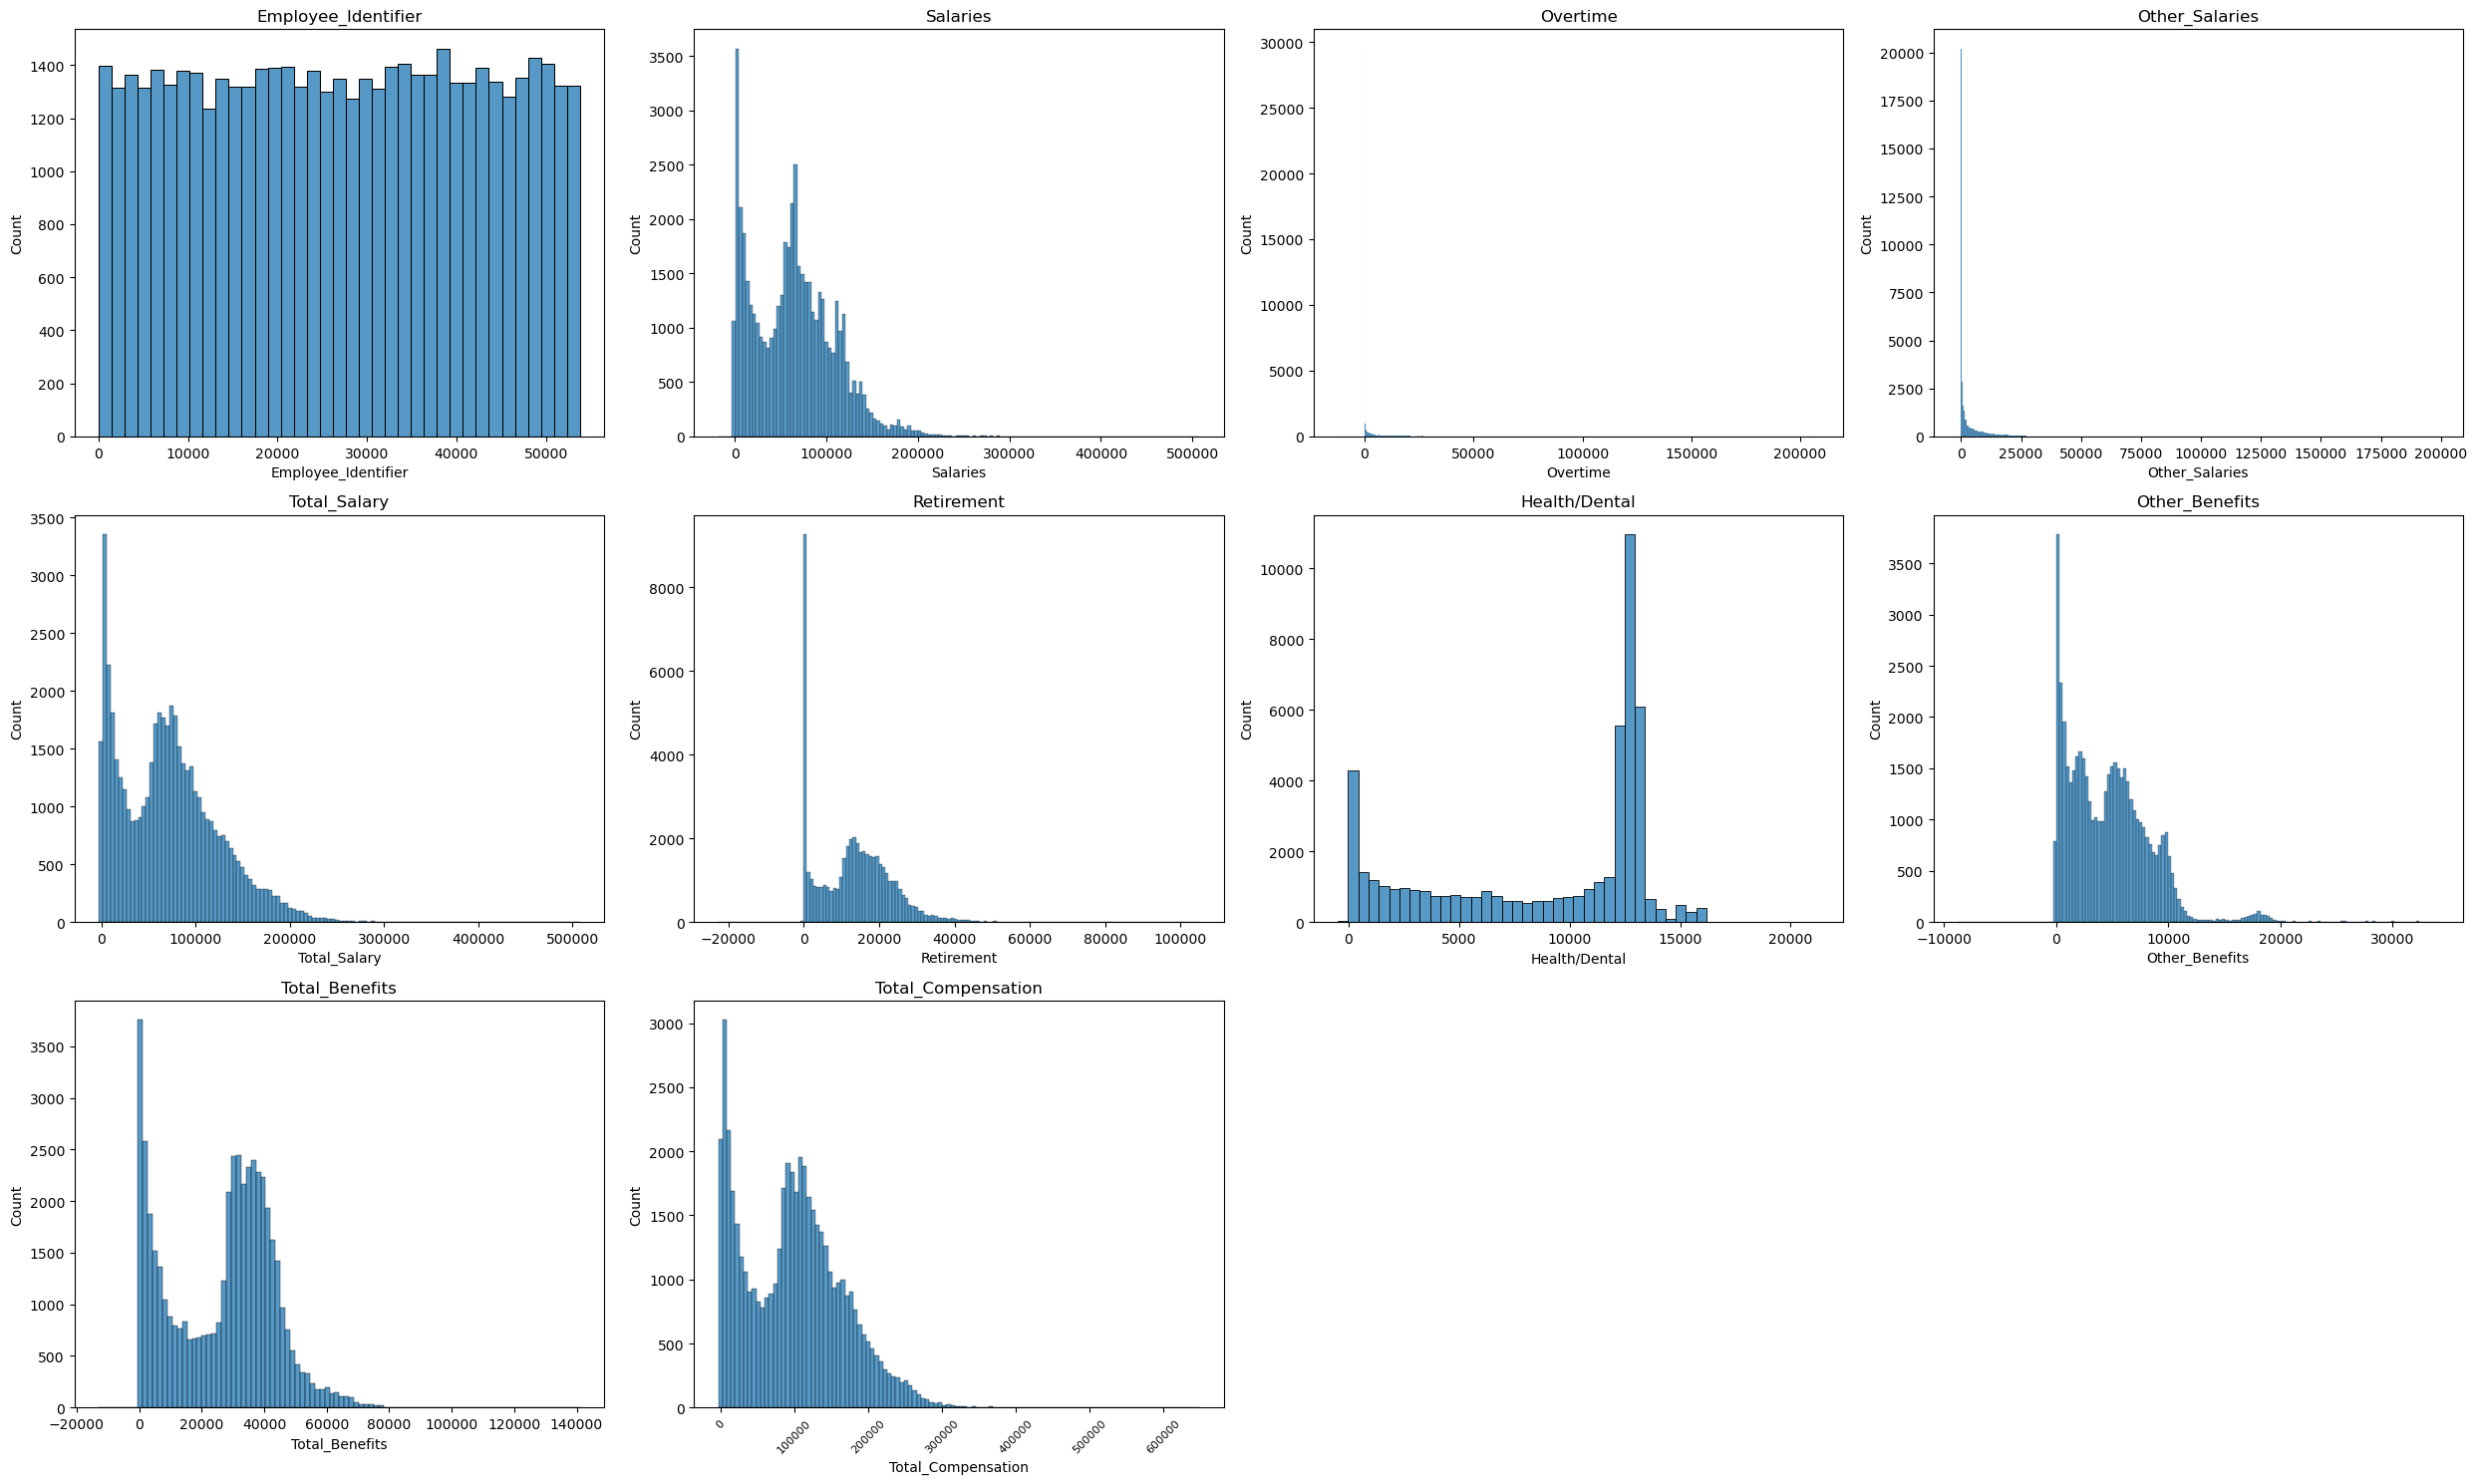

In [8]:
plt.rcParams['figure.figsize']=[25,15]
j=1
for i in cols:
    plt.subplot(3,4,j)
    sns.histplot(x=df_emp.loc[:,i])
    plt.title(i)
    j+=1

plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

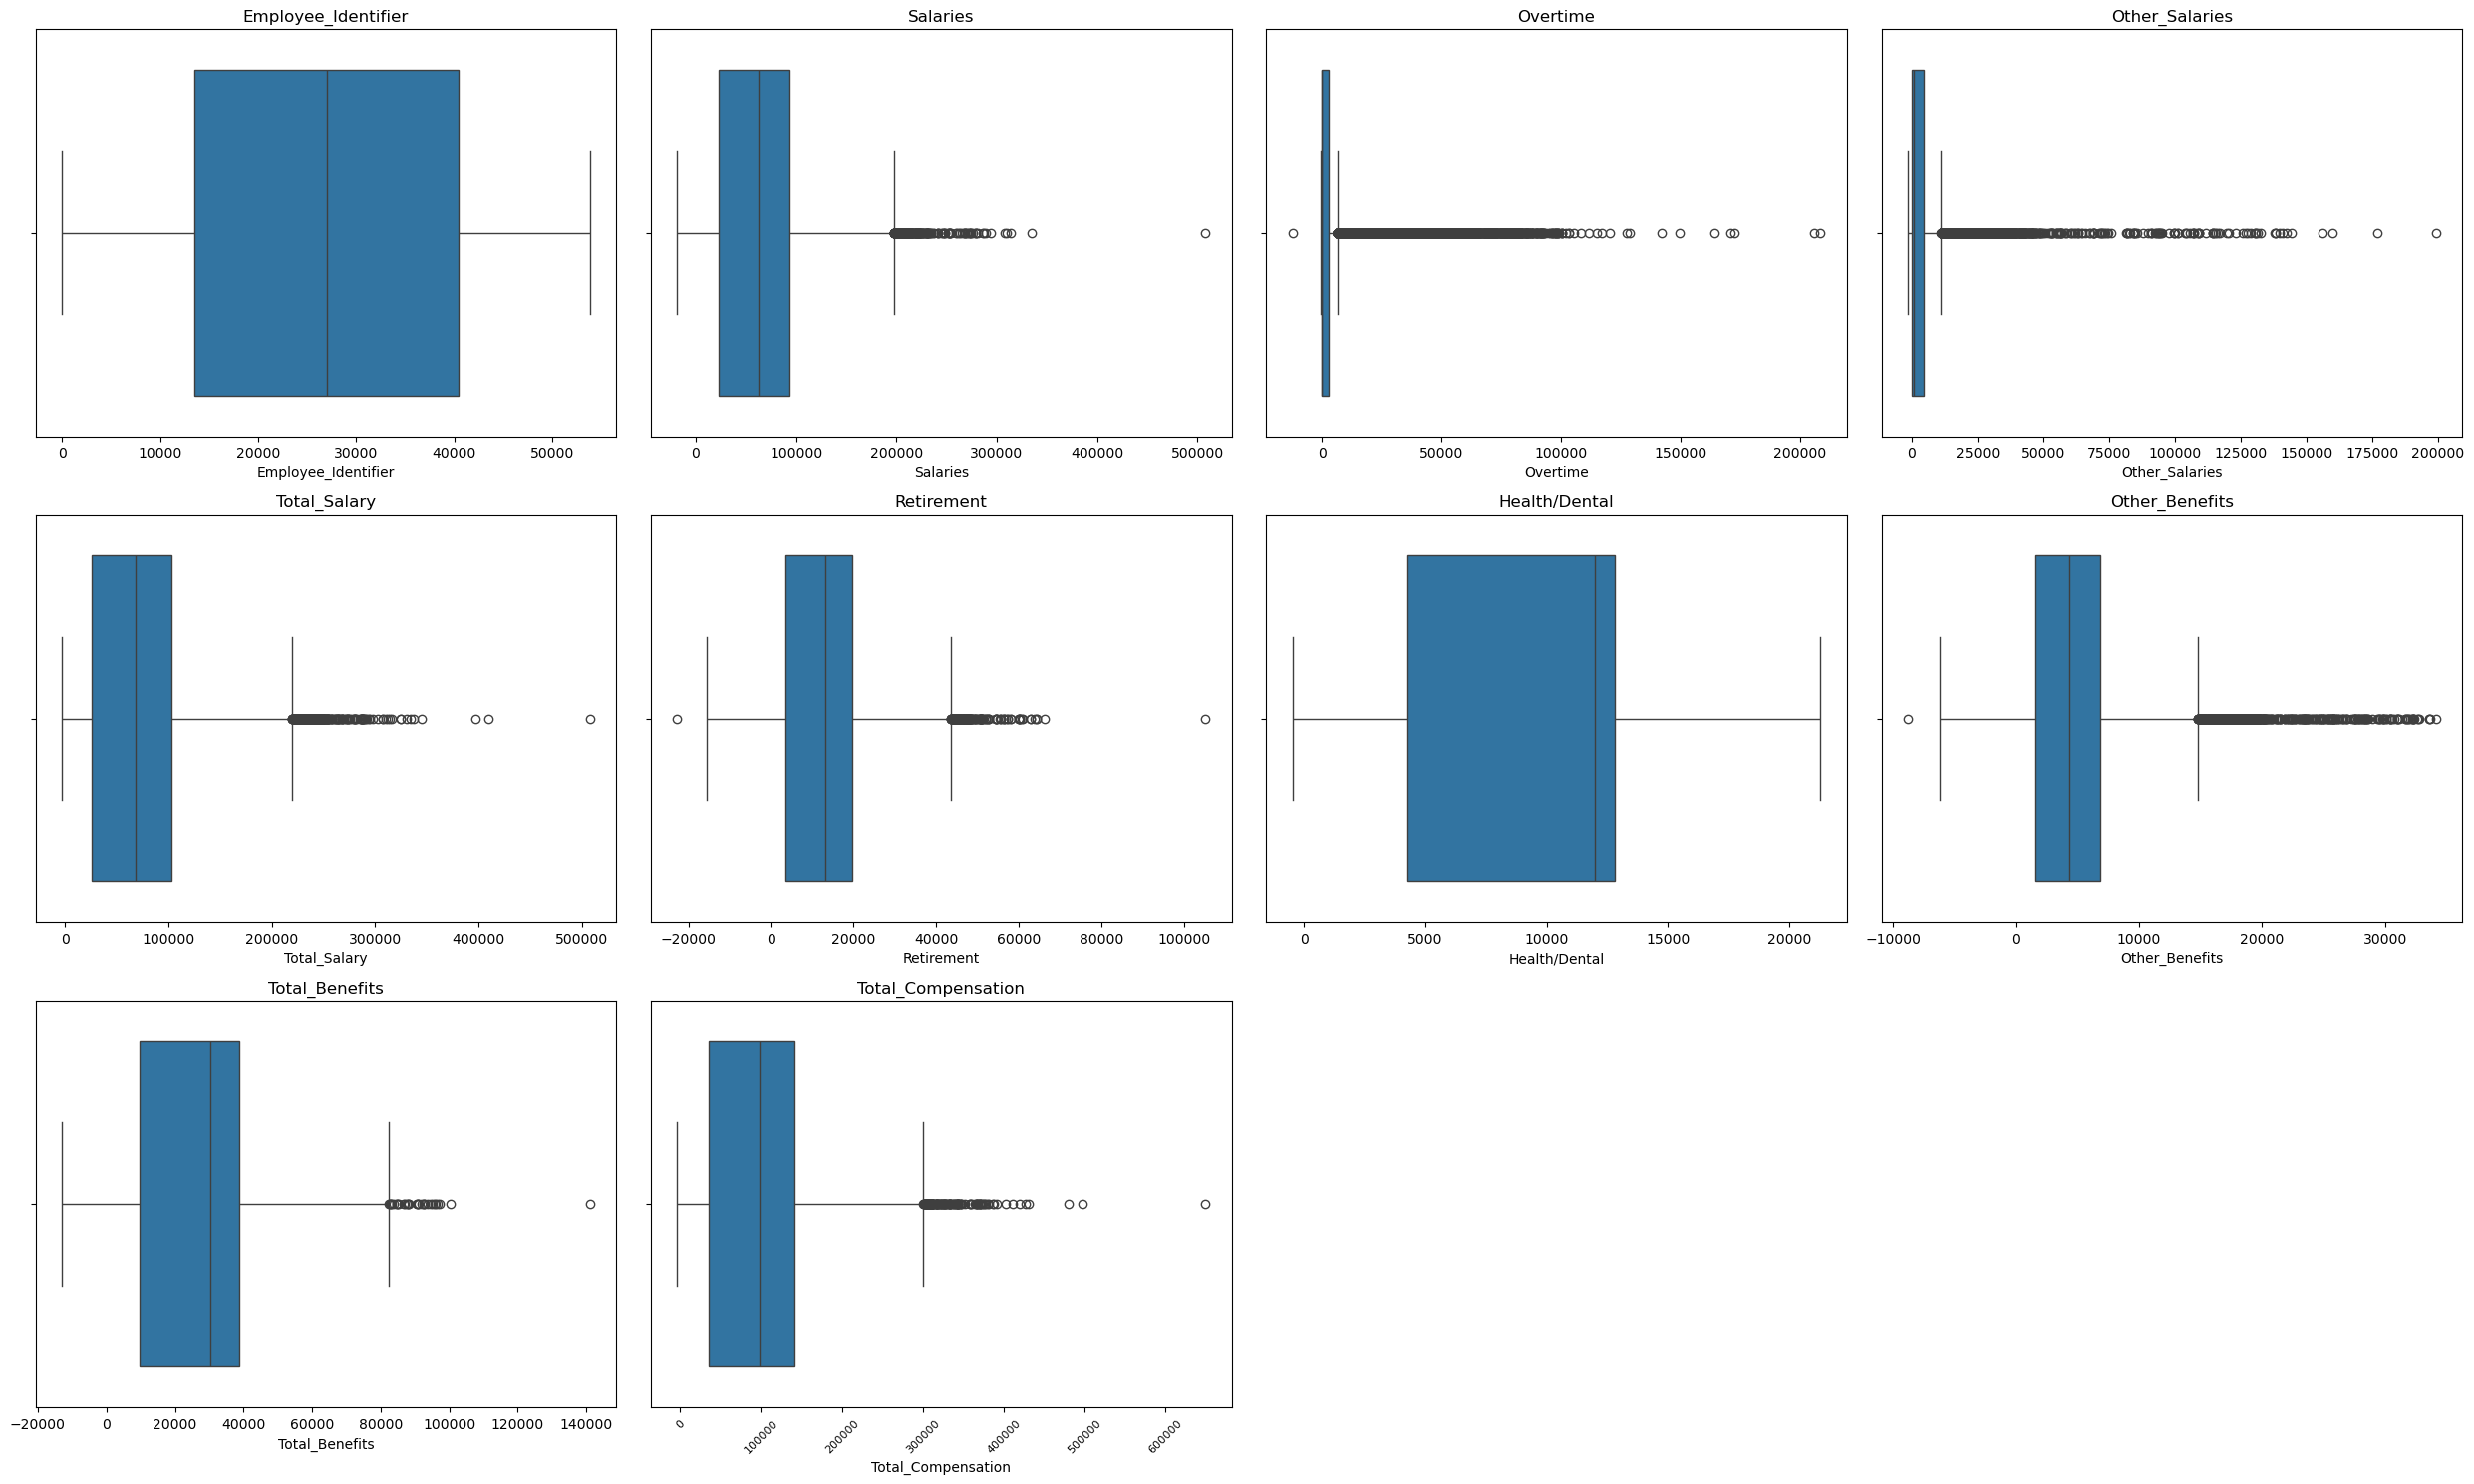

In [9]:

plt.rcParams['figure.figsize']=[25,15]
j=1
for i in cols:
    plt.subplot(3,4,j)
    sns.boxplot(x=df_emp.loc[:,i])
    plt.title(i)
    j+=1

plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

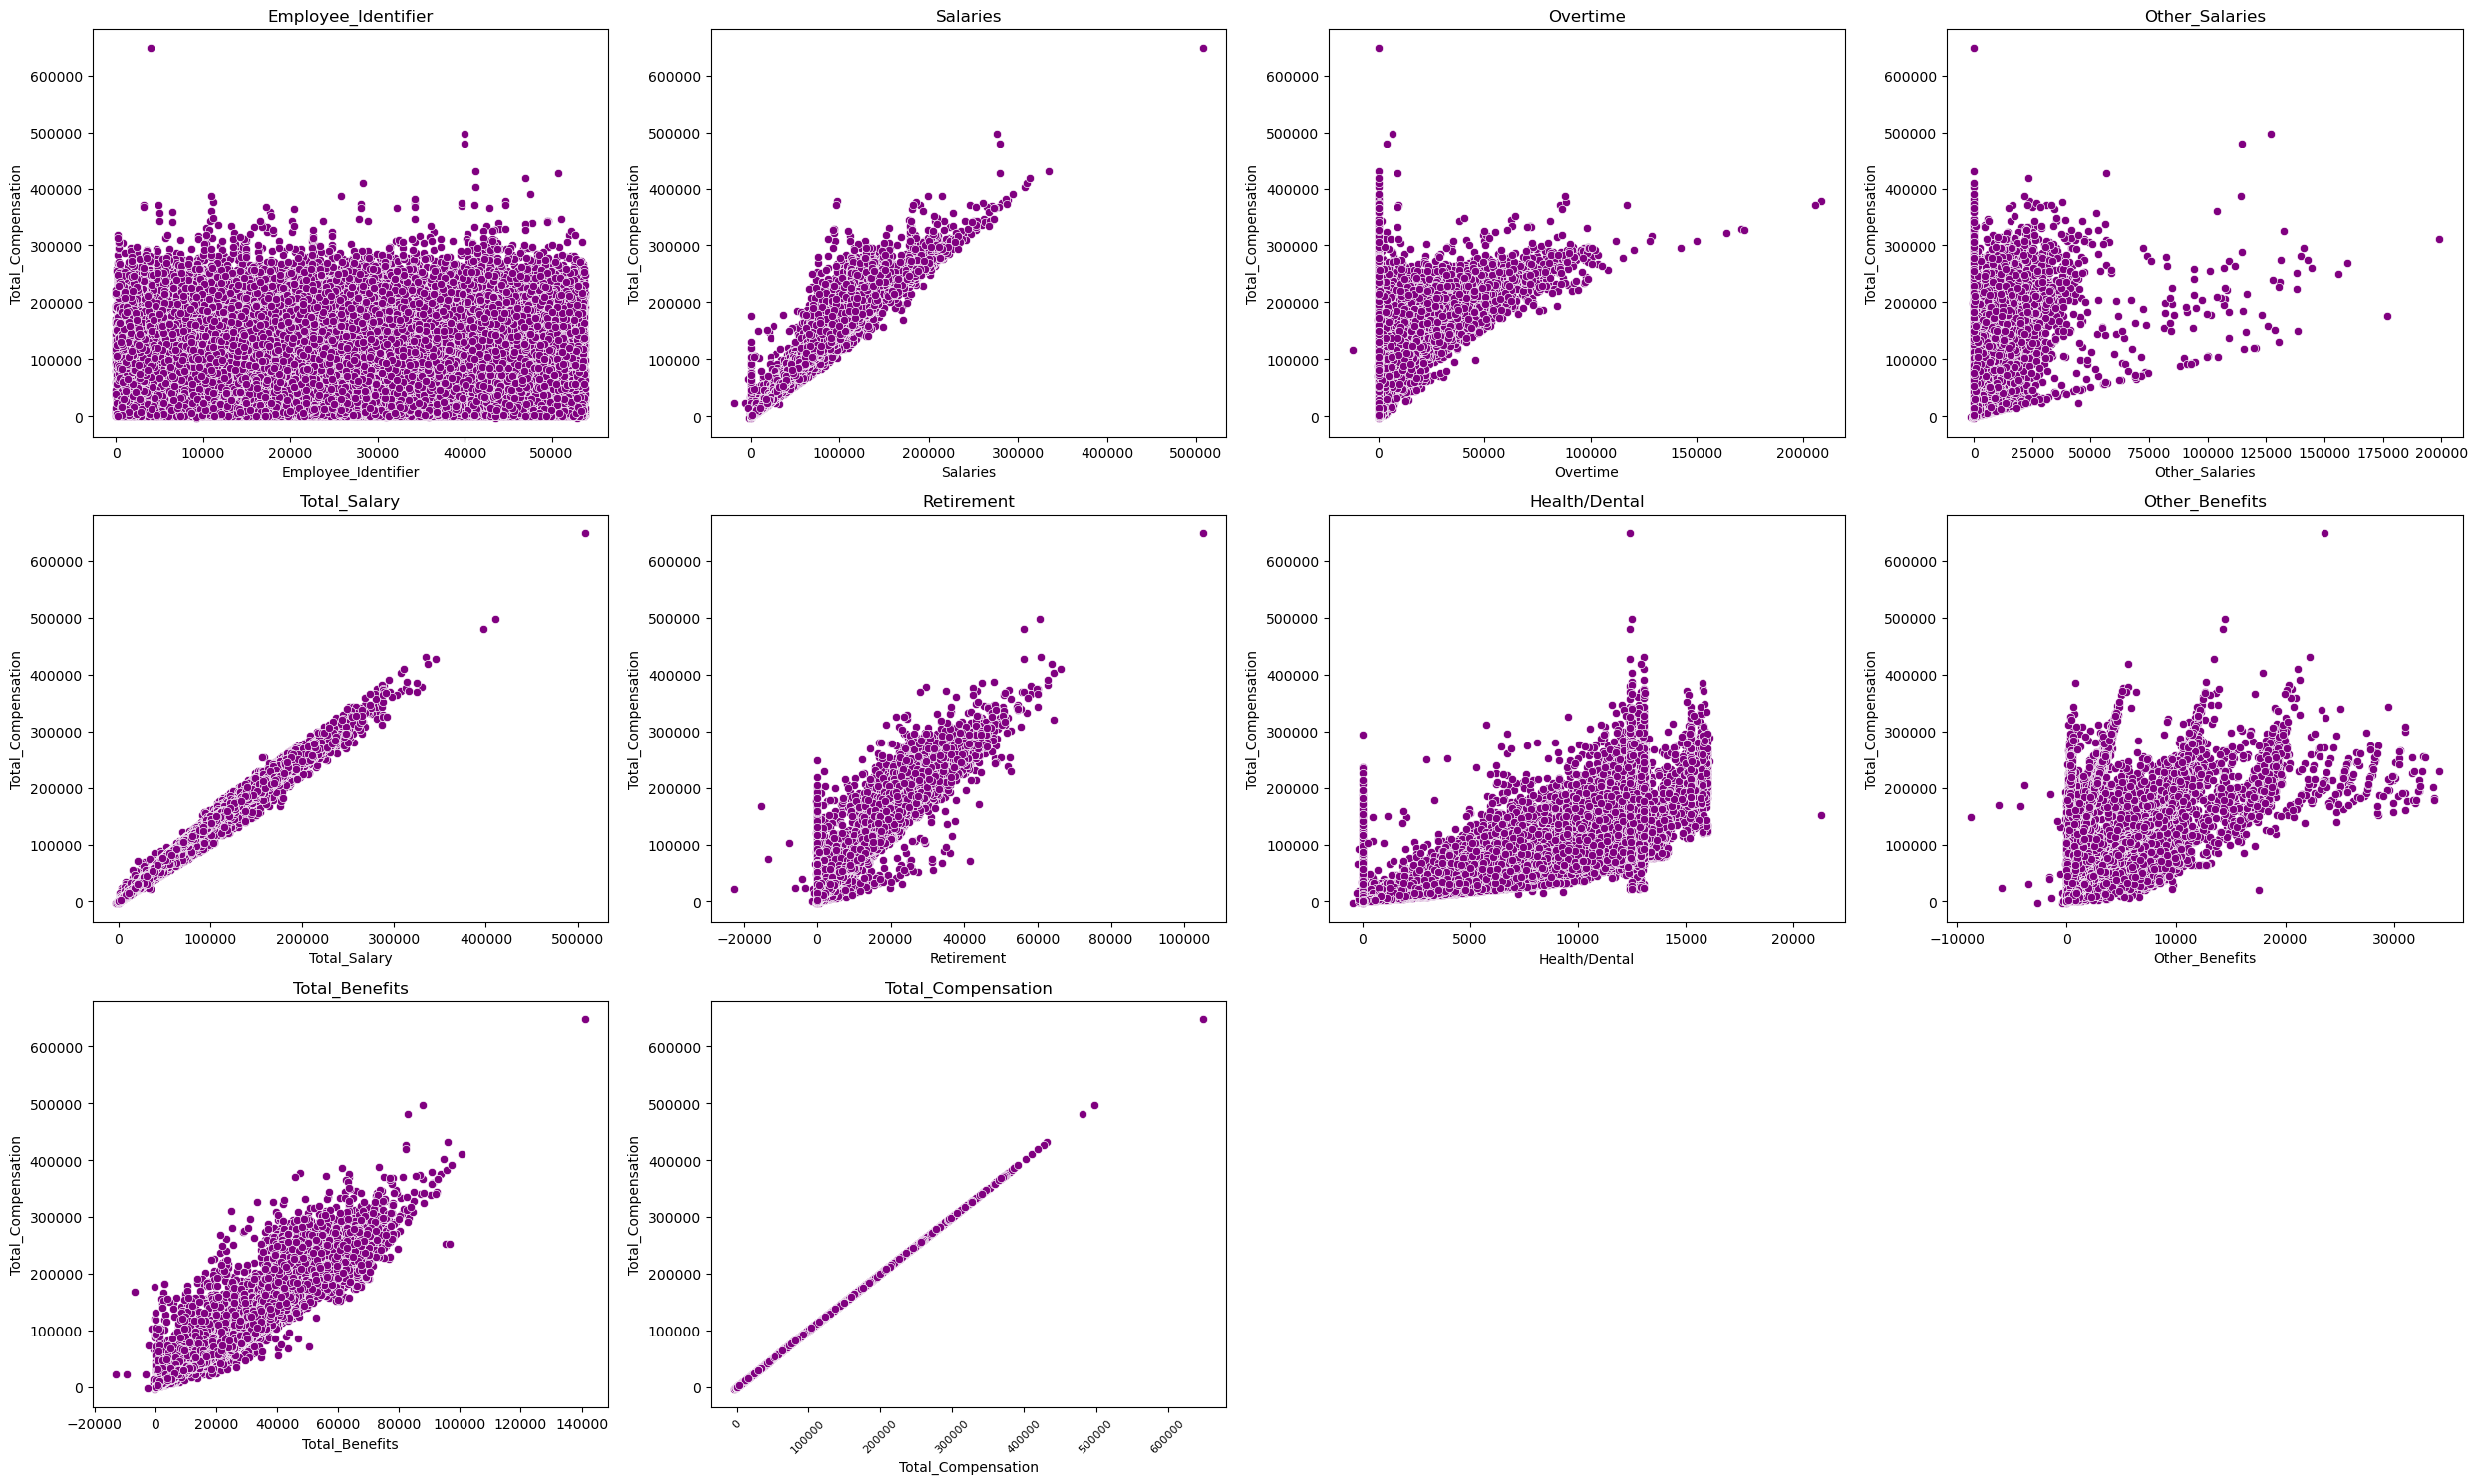

In [10]:

plt.rcParams['figure.figsize']=[25,15]
j=1
for i in cols:
    plt.subplot(3,4,j)
    sns.scatterplot(x=df_emp[i],y=df_emp['Total_Compensation'],color='purple')
    plt.title(i)
    j+=1

plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

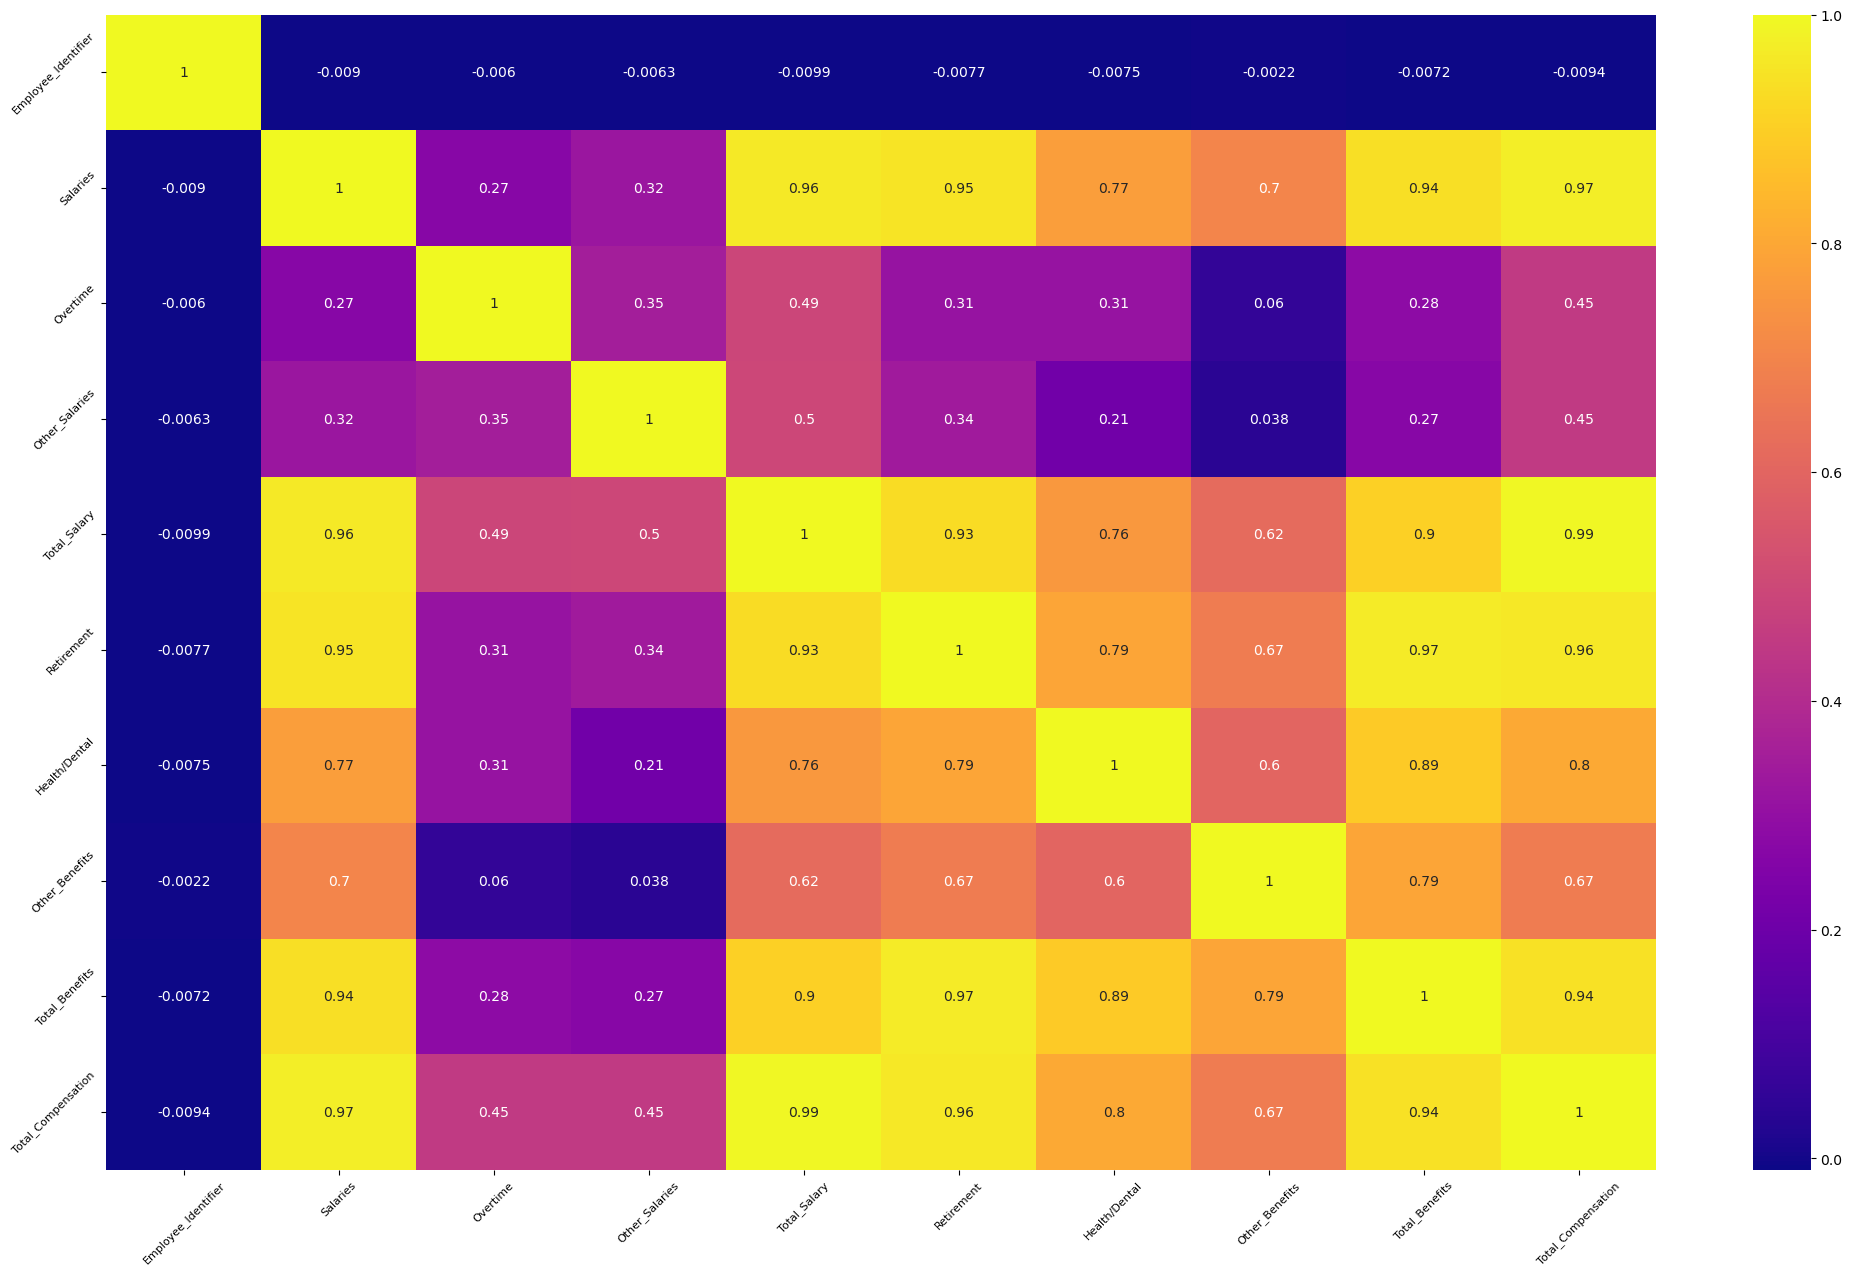

In [11]:
df_num=df_emp.select_dtypes(np.number)
sns.heatmap(df_num[cols].corr(),annot=True,cmap='plasma')
plt.xticks(rotation=45,fontsize=8)
plt.yticks(rotation=45,fontsize=8)
plt.show()

In [12]:
df_emp.isnull().sum().sum()

0

In [13]:
q1=df_num.quantile(0.25)
q3=df_num.quantile(0.75)
IQR=q3-q1
IQR






Employee_Identifier     26854.5000
Salaries                69684.4675
Overtime                 2648.8825
Other_Salaries           4477.0300
Total_Salary            77639.6025
Retirement              16021.0300
Health/Dental            8533.8300
Other_Benefits           5265.5550
Total_Benefits          29138.1000
Total_Compensation     106000.4400
dtype: float64

In [14]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [15]:
upper_limit

Employee_Identifier     80646.00000
Salaries               197558.53375
Overtime                 6622.20625
Other_Salaries          11192.57500
Total_Salary           219380.26625
Retirement              43612.26000
Health/Dental           25602.53500
Other_Benefits          14752.39000
Total_Benefits          82416.01500
Total_Compensation     300770.85500
dtype: float64

In [16]:
cols=df_emp.select_dtypes(include=np.number).columns
df_num=df_emp.select_dtypes(include=np.number)
df_cat=df_emp.select_dtypes(exclude=np.number)


In [17]:
df_num_wo=df_num[~((df_num <(lower_limit)) | (df_num > (upper_limit))).any(axis=1)]

In [18]:
df_num_wo

,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
3,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
5,50433,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84
...,...,...,...,...,...,...,...,...,...,...
49994,11140,10663.05,0.00,65.93,10728.98,0.00,3152.42,879.17,4031.59,14760.57
49996,35471,1787.41,0.00,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08
49997,42176,36552.83,0.00,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77
49998,10980,46995.30,0.00,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43


In [19]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Type            50000 non-null  object 
 1   Employee_Identifier  50000 non-null  int64  
 2   Salaries             50000 non-null  float64
 3   Overtime             50000 non-null  float64
 4   Other_Salaries       50000 non-null  float64
 5   Total_Salary         50000 non-null  float64
 6   Retirement           50000 non-null  float64
 7   Health/Dental        50000 non-null  float64
 8   Other_Benefits       50000 non-null  float64
 9   Total_Benefits       50000 non-null  float64
 10  Total_Compensation   50000 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 4.2+ MB


In [20]:
df_num=df_emp.select_dtypes(include=np.number)
df_cat=df_emp.select_dtypes(exclude=np.number)

df_num

,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
...,...,...,...,...,...,...,...,...,...,...
49995,1629,100222.50,17166.13,600.00,117988.63,18763.05,13068.80,9406.86,41238.71,159227.34
49996,35471,1787.41,0.00,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08
49997,42176,36552.83,0.00,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77
49998,10980,46995.30,0.00,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43


In [21]:
df_dummy=pd.get_dummies(df_cat,drop_first=True).astype(int)
df_dummy

,Year_Type_Fiscal
0,1
1,0
2,1
3,1
4,1
...,...
49995,1
49996,1
49997,1
49998,1


In [22]:
df_num.reset_index(drop=True,inplace=True)
df_dummy.reset_index(drop=True,inplace=True)
df_emp=pd.concat([df_num,df_dummy],axis=1)
df_emp.head()

,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_Type_Fiscal
0,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63,1
1,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23,0
2,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82,1
3,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08,1
4,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62,1


In [23]:
x=df_emp.drop('Total_Compensation',axis=1)
y=df_emp['Total_Compensation']
y


0        133629.63
1          2398.23
2        140084.82
3         61303.08
4         58612.62
           ...    
49995    159227.34
49996      2496.08
49997     53282.77
49998     82110.43
49999    104354.49
Name: Total_Compensation, Length: 50000, dtype: float64

## 
1. If the training error =0 (close to 0) and test error is higher then it is case of overfitting.
2. If the training error and testing error has large difference then it is case of overfitting. This is when machine learns very well on training data but it is not able to generalise on unseen test set.
3. If the trainning error =0 or very close to 0 then it is overfitted.
4. If the train error and test error are high then this is case of underfitting.
5. In underfitting conditions, machine does not learn well on training data as well as does not perform well on test data.
6. Overfitting conditions are High variance and underfitting conditions are high bias condition.

In [24]:
from sklearn.model_selection import train_test_split
# take all the x together and then all y together
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [25]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape,sep='\n')

(35000, 10)
(15000, 10)
(35000,)
(15000,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [27]:
lr=LinearRegression()
model_emp=lr.fit(xtrain,ytrain)

pred_train=model_emp.predict(xtrain)
pred_test=model_emp.predict(xtest)